In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.shape

(14999, 10)

In [9]:
left_df = df[df.left == 1]
left_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
left_df.shape

(3571, 10)

In [10]:
retained_df = df[df.left == 0]
retained_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [11]:
retained_df.shape

(11428, 10)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [13]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## EDA

<AxesSubplot:xlabel='salary', ylabel='count'>

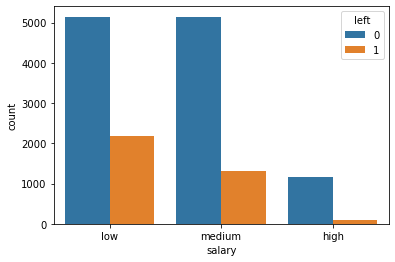

In [16]:
sns.countplot(x=df.salary,hue='left',data=df)

<AxesSubplot:xlabel='average_montly_hours', ylabel='count'>

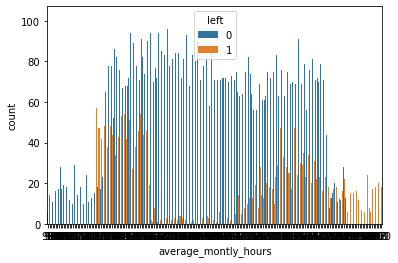

In [20]:
sns.countplot(x='average_montly_hours',hue='left',data=df)

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

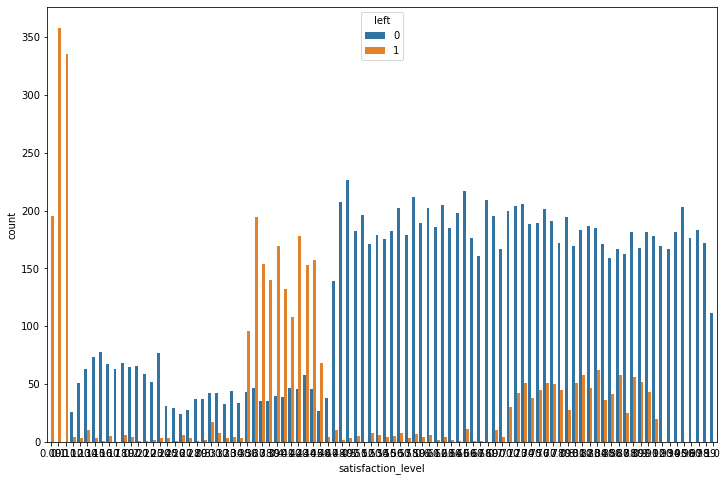

In [34]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.countplot(x='satisfaction_level',hue='left',data=df)

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

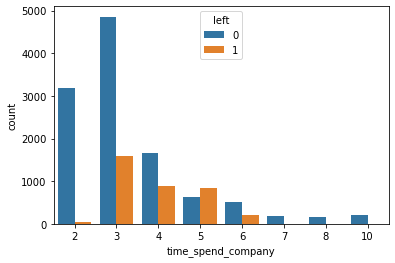

In [22]:
sns.countplot(x='time_spend_company',hue='left',data=df)

<AxesSubplot:xlabel='salary', ylabel='count'>

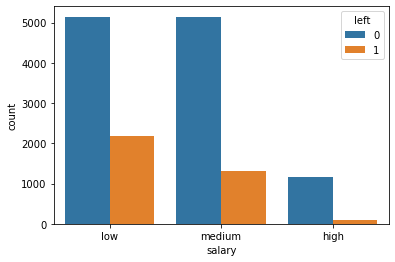

In [23]:
sns.countplot(x='salary',hue='left',data=df)Department

<AxesSubplot:xlabel='Department', ylabel='count'>

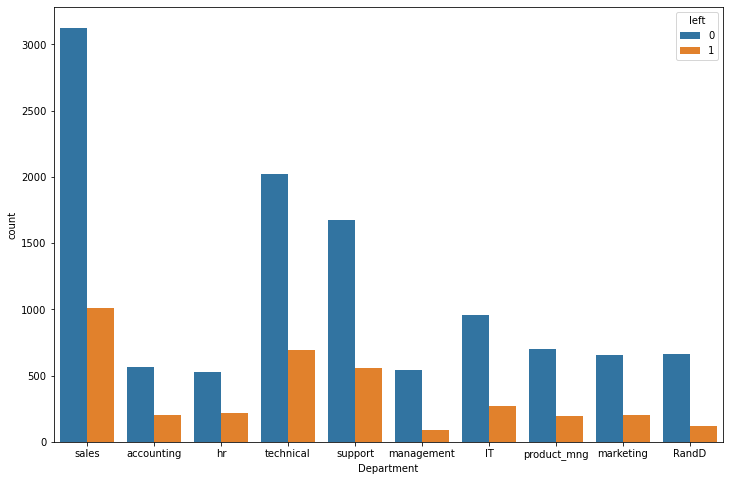

In [30]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.countplot(x='Department',hue='left',data=df)

In [40]:
df.isnull().values.any()

False

In [43]:
df['salary'] = df['salary'].replace(['low','medium','high'],[0,1,2]) 

In [47]:
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [48]:
y = df['left']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
Logreg = LogisticRegression()
Logreg.fit(X_train,Y_train)
y_pred = Logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Y_test,y_pred)

0.783

In [53]:
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.94      0.87      2299\n           1       0.58      0.26      0.35       701\n\n    accuracy                           0.78      3000\n   macro avg       0.69      0.60      0.61      3000\nweighted avg       0.75      0.78      0.75      3000\n'

<AxesSubplot:>

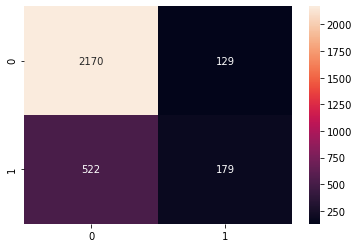

In [57]:
cnf = confusion_matrix(Y_test,y_pred)
sns.heatmap(cnf,fmt='d',annot=True)